In [1]:
import pypsa
import pandas as pd
import xarray as xr
n = pypsa.Network("elec_s_37_ec_lcopt_Co2L0.7-1H.nc")

print(n)

INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L0.7-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


PyPSA Network
Components:
 - Bus: 111
 - Carrier: 26
 - Generator: 326
 - GlobalConstraint: 1
 - Line: 52
 - Link: 198
 - Load: 37
 - Shape: 123
 - StorageUnit: 50
 - Store: 74
Snapshots: 8784


In [12]:
generation_data = n.generators_t.p

carrier_generation = pd.Series(0.0, index=n.generators.carrier.unique())

for gen_id, generator in n.generators.iterrows():
    carrier = generator['carrier']
    carrier_generation[carrier] += generation_data[gen_id].sum()

print(carrier_generation)

offwind-ac       3.188739e+07
offwind-float    2.251986e+07
oil              8.505466e+00
onwind           4.091106e+08
ror              1.680877e+08
solar            1.891945e+08
solar-hsat       4.369086e+01
CCGT             3.086355e+07
coal             6.365170e+08
lignite          3.507974e+08
biomass          4.528683e+07
nuclear          7.503638e+08
offwind-dc       6.604100e+07
OCGT             4.387025e+03
geothermal       6.330747e+05
dtype: float64


In [5]:
storage_data = n.storage_units_t.p_dispatch

phs_hydro_storage_units = n.storage_units[n.storage_units['carrier'].isin(['PHS', 'hydro'])]

phs_generation = storage_data[phs_hydro_storage_units[phs_hydro_storage_units['carrier'] == 'PHS'].index].sum().sum()
hydro_generation = storage_data[phs_hydro_storage_units[phs_hydro_storage_units['carrier'] == 'hydro'].index].sum().sum()

print(f"Total PHS generation: {phs_generation} MWh")
print(f"Total hydro generation: {hydro_generation} MWh")

Total PHS generation: 105236827.6154972 MWh
Total hydro generation: 375529483.2082405 MWh


In [ ]:
renewable_generators = n.generators[n.generators['carrier'].isin(['onwind', 'offwind-ac', 'offwind-dc', 'offwind-float', 'solar', 'solar-hsat', 'ror', 'geothermal'])]

n.generators.loc[renewable_generators.index, 'p_nom_extendable'] = False

un_generators = n.generators[n.generators['carrier'].isin(['oil', 'coal', 'CCGT', 'OCGT', 'lignite', 'biomass', 'nuclear'])]

n.generators.loc[un_generators.index, 'p_nom_extendable'] = True
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
snapshots_to_optimize = n.snapshots[:8784]

n.optimize(snapshots=snapshots_to_optimize, solver_name='gurobi')

In [27]:
n.objective_constant

42412469557.41788

In [13]:
import pandas as pd
generation_data = n.generators_t.p

carrier_generation = pd.Series(0.0, index=n.generators.carrier.unique())

for gen_id, generator in n.generators.iterrows():
    carrier = generator['carrier']
    carrier_generation[carrier] += generation_data[gen_id].sum()

print(carrier_generation)

offwind-ac       3.188739e+07
offwind-float    2.251986e+07
oil              8.505466e+00
onwind           4.091106e+08
ror              1.680877e+08
solar            1.891945e+08
solar-hsat       4.369086e+01
CCGT             3.086355e+07
coal             6.365170e+08
lignite          3.507974e+08
biomass          4.528683e+07
nuclear          7.503638e+08
offwind-dc       6.604100e+07
OCGT             4.387025e+03
geothermal       6.330747e+05
dtype: float64


In [14]:
storage_data = n.storage_units_t.p

phs_hydro_storage_units = n.storage_units[n.storage_units['carrier'].isin(['PHS', 'hydro'])]

phs_generation = storage_data[phs_hydro_storage_units[phs_hydro_storage_units['carrier'] == 'PHS'].index].sum().sum()
phs_generation_1 = storage_data[phs_hydro_storage_units[phs_hydro_storage_units['carrier'] == 'PHS'].index].sum()

hydro_generation = storage_data[phs_hydro_storage_units[phs_hydro_storage_units['carrier'] == 'hydro'].index].sum().sum()
hydro_generation_1 = storage_data[phs_hydro_storage_units[phs_hydro_storage_units['carrier'] == 'hydro'].index].sum()

print(f"Total PHS generation: {phs_generation} MWh")
print(f"Total hydro generation: {hydro_generation} MWh")
print(f"Each country PHS generation: {phs_generation_1} MWh")
print(f"Each country hydro generation: {hydro_generation_1} MWh")

Total PHS generation: -3.7100182365690237e-06 MWh
Total hydro generation: 375529483.2082405 MWh
Each country PHS generation: StorageUnit
AT1 0 PHS   -6.073387e-07
BA1 0 PHS    4.702905e-13
BE1 0 PHS   -9.597898e-09
BG1 0 PHS   -5.845504e-08
CH1 0 PHS   -2.114044e-06
DE1 0 PHS   -3.396271e-07
ES1 0 PHS    8.084462e-07
FR1 0 PHS   -5.889306e-07
GB0 0 PHS   -1.492162e-08
GR1 0 PHS    9.059931e-09
HR1 0 PHS   -1.901390e-07
IE5 0 PHS    5.942775e-08
IT1 0 PHS    2.247398e-07
IT3 0 PHS    1.605531e-08
LT6 0 PHS    2.349407e-08
LU1 0 PHS    1.456283e-07
ME1 0 PHS    8.074039e-10
NO2 0 PHS   -4.030752e-08
PL1 0 PHS   -4.267149e-07
PT1 0 PHS   -5.996699e-07
RS1 0 PHS   -1.637090e-09
SE2 0 PHS   -5.560651e-09
SI1 0 PHS    9.500809e-10
SK1 0 PHS   -1.683475e-09
dtype: float64 MWh
Each country hydro generation: StorageUnit
AL1 0 hydro    4.875297e+06
AT1 0 hydro    1.796882e+07
BA1 0 hydro    4.579999e+06
BE1 0 hydro    3.681985e+04
BG1 0 hydro    2.667429e+06
CH1 0 hydro    2.694837e+07
DE1 0 hyd

In [10]:
import pandas as pd

generation_data = n.generators_t.p /1000000 

generation_by_country = generation_data.groupby(n.generators.bus.map(n.buses['country']), axis=1).sum()

total_generation_by_country = generation_by_country.sum()

# 显示结果
print("各国家的总发电量（单位：TWh）：")
print(total_generation_by_country)

各国家的总发电量（单位：TWh）：
bus
AL      0.157932
AT     33.127683
BA      7.466719
BE     63.507409
BG     32.838949
CH     39.333434
CZ     25.890088
DE    636.563247
DK     63.932592
EE      1.204823
ES    194.476360
FI     67.432854
FR    496.141676
GB    292.953193
GR     52.535167
HR      1.600826
HU     30.363217
IE     25.377378
IT    147.704091
LT      2.828147
LU      1.152855
LV      3.255391
ME      1.891549
MK      0.150133
NL     78.123930
NO     11.578048
PL    146.246167
PT     31.761006
RO     49.252542
RS     28.616136
SE     98.340096
SI     11.271831
SK     24.231535
dtype: float64


/var/folders/gy/z7x44kpn24d18spbg3w6_5fr0000gn/T/ipykernel_41558/2010720313.py:7: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [15]:
import pandas as pd

generators_info = n.generators[['carrier', 'p_nom_opt']]

total_capacity_per_carrier = generators_info.groupby('carrier')['p_nom_opt'].sum()

# 输出结果
print(total_capacity_per_carrier)

carrier
CCGT             169023.489186
OCGT                 47.150000
biomass           17029.158976
coal              73416.104700
geothermal           98.000000
lignite           39939.732918
nuclear          119412.100000
offwind-ac         6764.849324
offwind-dc        12707.397487
offwind-float      5518.103361
oil                4686.760390
onwind           184641.740138
ror               51522.370043
solar            152966.600874
solar-hsat            0.039197
Name: p_nom_opt, dtype: float64


In [16]:
import pandas as pd

storage_info = n.storage_units[['carrier', 'p_nom']]

total_storage_capacity_per_carrier = storage_info.groupby('carrier')['p_nom'].sum()

print(total_storage_capacity_per_carrier)

carrier
PHS      54837.473000
hydro    99387.650991
Name: p_nom, dtype: float64


In [19]:
generators_info = n.generators[['bus', 'p_nom_opt']]

buses_info = n.buses[['country']]

generators_info = generators_info.join(buses_info, on='bus')

total_capacity_per_country = generators_info.groupby('country')['p_nom_opt'].sum()

print(total_capacity_per_country)

country
AL       154.791575
AT     13265.921853
BA       979.311437
BE     20893.448666
BG      5582.025998
CH     10534.138624
CZ      5034.341892
DE    197300.463281
DK     12897.794322
EE       619.302253
ES     79344.784529
FI     14244.519433
FR    109588.437010
GB    108638.929879
GR     16660.308807
HR      1204.764722
HU      7178.557078
IE      9120.308813
IT     90009.553778
LT      1833.002406
LU       598.509020
LV      2660.100045
ME       337.063097
MK       131.361256
NL     31214.771731
NO      5257.954784
PL     26722.037912
PT     14502.397183
RO     12472.580652
RS      4978.480076
SE     26304.948009
SI      2448.421225
SK      5060.265248
Name: p_nom_opt, dtype: float64


In [20]:
storage_info = n.storage_units[['bus', 'p_nom']]

buses_info = n.buses[['country']]

storage_info = storage_info.join(buses_info, on='bus')

total_storage_capacity_per_country = storage_info.groupby('country')['p_nom'].sum()

print(total_storage_capacity_per_country)

country
AL     1690.700000
AT     8657.920000
BA     2054.500000
BE     1320.782803
BG     2789.140000
CH    15005.860000
DE     7888.720000
ES    23846.587000
FI     1295.900000
FR    13432.792994
GB      668.300000
GR     3265.000000
HR     2110.104459
HU       28.000000
IE      393.000000
IT    11574.800000
LT      900.000000
LU     2585.000000
ME      651.961000
NO    28808.474200
PL     1938.101911
PT     5214.400000
RO     4449.940000
RS     1404.100000
SE    10888.686625
SI      298.000000
SK     1064.353000
Name: p_nom, dtype: float64


In [22]:
n.statistics.supply()

component    carrier                 
Line         AC                          6.677946e+08
StorageUnit  Pumped Hydro Storage        1.052176e+08
             Reservoir & Dam             3.755295e+08
Store        Battery Storage             1.330860e+01
             Hydrogen Storage            1.687806e+00
Link         DC                          2.151674e+08
             H2 electrolysis             3.687381e+01
             H2 fuel cell                1.845468e+01
             battery charger             5.709382e+02
             battery discharger          5.564602e+02
Generator    Combined-Cycle Gas          3.086355e+07
             Offshore Wind (AC)          3.188739e+07
             Offshore Wind (DC)          6.604100e+07
             Offshore Wind (Floating)    2.251986e+07
             Onshore Wind                4.091106e+08
             Open-Cycle Gas              4.387025e+03
             Run of River                1.680877e+08
             Solar                       1.8

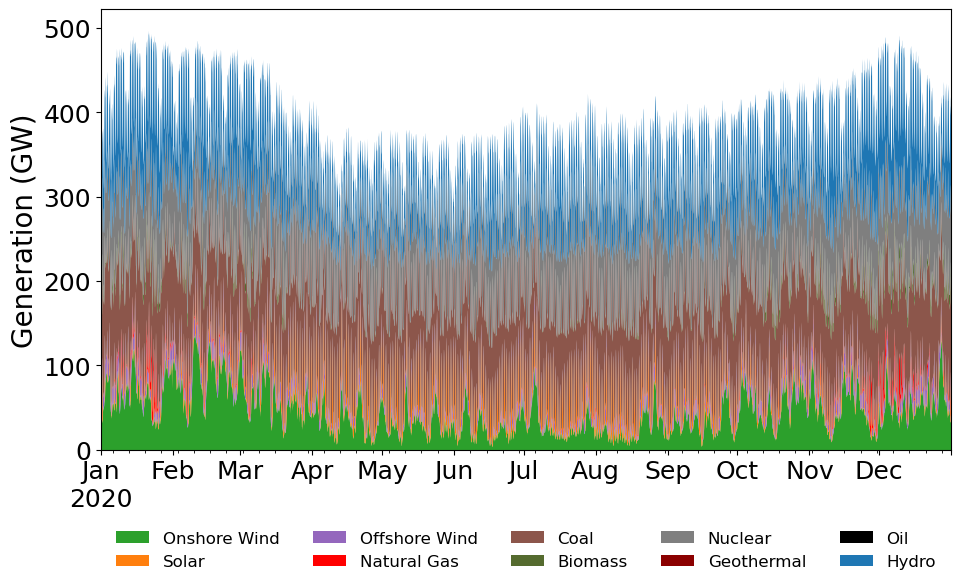

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

supply_data = n.statistics.supply(comps=["Generator", "StorageUnit"], aggregate_time=False)

# Convert the supply data to a DataFrame for easier processing
supply_data = supply_data.droplevel(0).T

# Merge specific energy types
supply_data['Offshore Wind'] = supply_data[['Offshore Wind (AC)', 'Offshore Wind (DC)', 'Offshore Wind (Floating)']].sum(axis=1)
supply_data['Natural Gas'] = supply_data[['Combined-Cycle Gas', 'Open-Cycle Gas']].sum(axis=1)
supply_data['Coal'] = supply_data[['coal', 'lignite']].sum(axis=1)
supply_data['Solar'] = supply_data[['Solar', 'solar-hsat']].sum(axis=1)
supply_data['Biomass'] = supply_data['biomass']
supply_data['Nuclear'] = supply_data['nuclear']
supply_data['Geothermal'] = supply_data['geothermal']
supply_data['Oil'] = supply_data['oil']
supply_data['Hydro'] = supply_data[['Pumped Hydro Storage', 'Reservoir & Dam', 'Run of River']].sum(axis=1)

# Drop the individual columns that were merged
supply_data = supply_data.drop(columns=[
    'Offshore Wind (AC)', 'Offshore Wind (DC)', 'Offshore Wind (Floating)', 
    'Combined-Cycle Gas', 'Open-Cycle Gas', 
    'coal', 'lignite', 
    'solar-hsat', 
    'Pumped Hydro Storage', 'Reservoir & Dam', 'Run of River', 'oil', 'geothermal', 'nuclear', 'biomass'
])

custom_colors = {
    'Offshore Wind': '#9467bd',  # 绿色
    'Onshore Wind': '#2ca02c',   # 紫色
    'Solar': '#ff7f0e',          # 橙色
    'Natural Gas': 'red',    # 天蓝色
    'Coal': '#8c564b',           # 棕色
    'Biomass': '#556b2f',        # 屎绿色
    'Nuclear': '#7f7f7f',        # 灰色
    'Geothermal': '#8b0000',     # 深红色
    'Oil': 'black',              # 黑色
    'Hydro': '#1f77b4',          # 深蓝色
}

fig, ax = plt.subplots(figsize=(10, 6))

supply_data.div(1e3).plot.area(
    ax=ax,
    linewidth=0,
    color=[custom_colors.get(x, '#333333') for x in supply_data.columns] 
)

ax.legend(  
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.15), 
    frameon=False, 
    ncol=5,  
    prop={'size': 12}  
)


ax.set_xlabel("", fontsize=14) 
ax.set_ylabel("Generation (GW)", fontsize=20)


ax.tick_params(axis='x', rotation=0, labelsize=18)  
ax.tick_params(axis='y', labelsize=18)  


plt.tight_layout()


plt.show()